In [1]:
import pickle
import os
import pandas as pd
import numpy as np 
from tqdm import tqdm
from util import *

In [2]:
import matplotlib.pyplot as plt

In [3]:
path = "./RESULT/240_seq"
res_ls = os.listdir(os.path.join(path))
res_ls.sort()

In [4]:
result_all = []
for f_name in tqdm(res_ls):
    df = pd.DataFrame(pd.read_pickle(os.path.join(path,'{}'.format(f_name))))
    result_all.append(df)
result_table = pd.concat(result_all)

100%|██████████| 106/106 [00:00<00:00, 840.26it/s]


In [16]:
# Date Month 
last_day = [x[1] for x in result_table['Date'].values]
first_day = [x[0] for x in result_table['Date'].values]

# reindexing by date
result_table.index = last_day
result_table = result_table.sort_index()
last_day = list(result_table.index)

In [17]:
result_table.index

DatetimeIndex(['2012-07-31', '2012-08-31', '2012-09-28', '2012-10-31',
               '2012-11-30', '2012-12-31', '2013-01-31', '2013-02-28',
               '2013-03-29', '2013-04-30',
               ...
               '2020-07-31', '2020-08-31', '2020-09-30', '2020-10-30',
               '2020-11-30', '2020-12-31', '2021-01-29', '2021-02-26',
               '2021-03-31', '2021-04-30'],
              dtype='datetime64[ns]', length=106, freq=None)

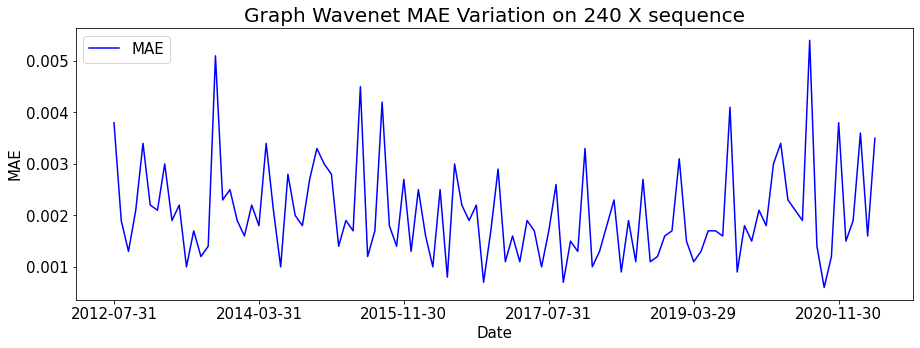

In [18]:
plt.figure(figsize = (15,5))
x_range = np.arange(0,len(result_table), 20)
plt.plot(result_table['test_loss(%)'].values/100, label = 'MAE', color = 'blue')
plt.title("Graph Wavenet MAE Variation on 240 X sequence", fontsize = 20)
plt.ylabel("MAE", fontsize = 15)
plt.xlabel("Date",fontsize = 15)
plt.legend(loc='upper left', fontsize = 15)
plt.xticks(x_range, [last_day[i].date() for i in x_range], fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [19]:
np.mean(result_table['test_loss(%)'].values/100)

0.0020547169811320756

Text(0.5, 0, 'Number of month')

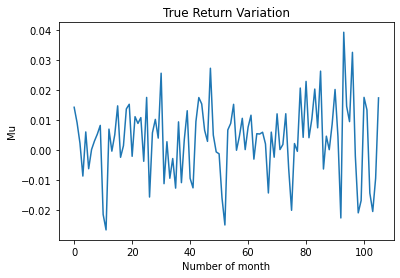

In [8]:
plt.plot(result_table['true_mu'].values)
plt.title("True Return Variation")
plt.ylabel("Mu")
plt.xlabel("Number of month")

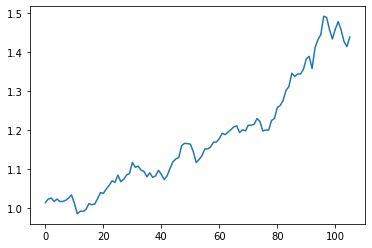

In [9]:
plt.plot((1+result_table['true_mu']).cumprod().values)

# 같은기간에 대한 benchmark 잡고 (SPY) 수익률 비교 
# mu 에 대한 volatility 

In [10]:
(result_table['true_mu'].std()) * np.sqrt(12) # annualized std for portfolio return 


0.043229688455842685

In [12]:
### X
price_df = pd_setting(pd.read_csv("./data/features/price_df.csv"))
mu_df = pd_setting(pd.read_csv("./data/features/mu_df.csv"))
sigma_df = pd_setting(pd.read_csv("./data/features/sigma_df.csv"))

feat_date = list(price_df.index)

In [13]:
dff = pd_setting(pd.read_csv("./data/df_XY.csv"))

dfy = dff.loc[feat_date]
# extracting Y columns
Y_col = [x for x in dfy.columns if x[-2:]=='_Y']
dfy = dfy[Y_col]

In [14]:
# benchmark asset
spy_mu_month = [round(return_volatility(dfy[['SPY_Y']].loc[x[0]:x[1]])[0][0],4) for x in result_table['Date'].values]
spy_dict = {}
spy_dict['spy_mu_month'] = spy_mu_month
